In [1]:
## LOAD MNIST DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir('C:\\Users\\prudi\\Desktop\\Data Sets\\MNIST')

In [2]:
d0=pd.read_csv('train.csv')

In [3]:
labels=d0['label']

In [4]:
data=d0.drop('label',axis=1)

In [6]:
print(labels.shape)
print(data.shape)

(42000,)
(42000, 784)


C:\Users\prudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


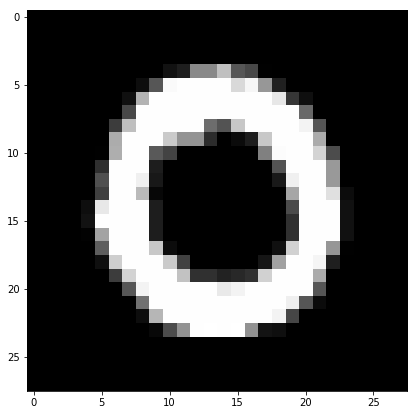

In [7]:
plt.figure(figsize=(7,7))
idx=1
grid_data=data.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

# 2D Visualization Using PCA
labels=l.head()
data=d0.head()

print("the shape of sample data=",data.shape)

In [8]:
# Data preprocessing : Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(42000, 784)


C:\Users\prudi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
## Find the co-vairance matrix which is : AT*A
sample_data=standardized_data

## Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

print('shape of covariance matrix is ',covar_matrix.shape)

shape of covariance matrix is  (784, 784)


In [10]:
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(781,783))
print("shape of eigh vectors =",vectors.shape)
vectors=vectors.T
print('updated shape of eigh vectors =',vectors.shape)
print('shpe of values =',values)

shape of eigh vectors = (784, 3)
updated shape of eigh vectors = (3, 784)
shpe of values = [1124873.374806   1222652.44613786 1709211.41082575]


In [11]:
import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,sample_data.T)
print("resultant new data points shape",vectors.shape,"x",sample_data.T.shape,"=",new_coordinates.shape)


resultant new data points shape (3, 784) x (784, 42000) = (3, 42000)


In [12]:
import pandas as pd
import numpy as np
## appending label to 2d projected data
new_coordinates=np.vstack((new_coordinates,labels)).T

dataframe=pd.DataFrame(data=new_coordinates,columns=('1st principal','2nd principal','3rd Principal','output'))
dataframe.shape

(42000, 4)

In [13]:
## Using SKLEARN

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca =PCA(n_components=2)
pca .fit(standardized_data)
principalComponents=pca.transform(standardized_data)

## Creating a DataFrame
principalDf = pd.DataFrame(data = principalComponents)

## Creating the final DF by merging the PC's and Label
finalDf = pd.concat([principalDf, labels], axis = 1)
finalDf.head()

print("""Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 784 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 40.38% of the variance and the second principal component contains 29.03% of the variance. Together, the two components contain 69.41% of the information.""")
print('\n')
print('Variance Explained : ')

Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 784 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 40.38% of the variance and the second principal component contains 29.03% of the variance. Together, the two components contain 69.41% of the information.


Variance Explained : 


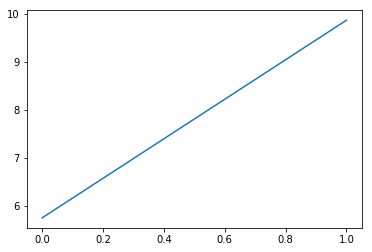

In [16]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [17]:
finalDf.head()
finalDf.columns=['principal component 1','principal component 2','label']

In [18]:
finalDf['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

[1, 0, 4, 7, 3, 5, 8, 9, 2, 6]


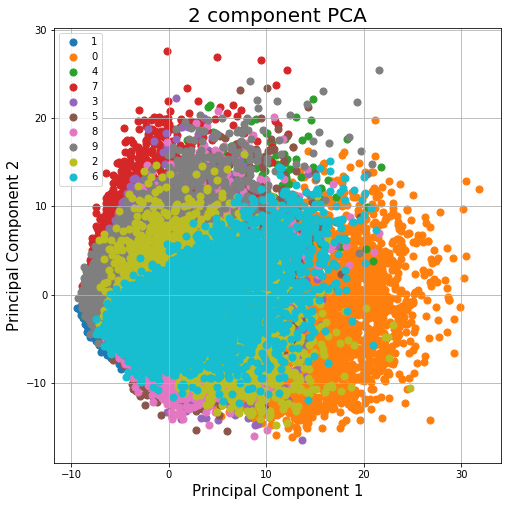

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(finalDf['label'].unique())
print(targets)
for target,in zip(targets):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_

In [77]:
pca.explained_variance_ratio_

array([0.05912341, 0.04251172])